In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# esse conjunto que o Kaggle chama de teste não será usado dessa forma porque ele não 
# contém a classe dos exemplos e, dessa forma, não podemos avaliar o modelo com ele.
# para a avaliação, vamos separar o conjunto inicial que vamos chamar de "df" entre treino e teste
# e fazer as predições para submeter para o Kaggle com o conjunto chamado de "submission"
df = pd.read_csv('https://raw.githubusercontent.com/mulheres-em-ia/bootcamp-mia-2022/main/7.%20Classifica%C3%A7%C3%A3o%202/data/train.csv')
submission = pd.read_csv('https://raw.githubusercontent.com/mulheres-em-ia/bootcamp-mia-2022/main/7.%20Classifica%C3%A7%C3%A3o%202/data/test.csv')

In [3]:
df.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
submission.head(2)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [5]:
df2 = df

In [6]:
df.shape


(891, 12)

In [7]:
submission.shape


(418, 11)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
def count_unique(df):
  print("Quantidade de valores únicos para cada feature")
  for i in df.columns:
    print(f"{i}: {df[i].nunique()}")

In [10]:
count_unique(df)


Quantidade de valores únicos para cada feature
PassengerId: 891
Survived: 2
Pclass: 3
Name: 891
Sex: 2
Age: 88
SibSp: 7
Parch: 7
Ticket: 681
Fare: 248
Cabin: 147
Embarked: 3


In [11]:
columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']

df = df.drop(columns, axis=1)

In [12]:
df.head(2)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [13]:
df.shape


(891, 8)

# Exploratory Data Analysis

## Survived (Sobrevivência do passageiro)


In [14]:
df.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

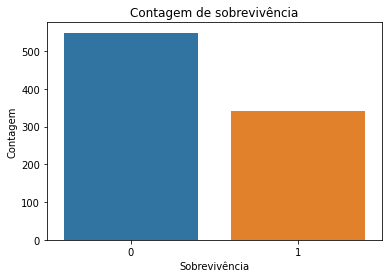

In [15]:
sns.countplot(data=df, x = 'Survived')
plt.title("Contagem de sobrevivência")
plt.xlabel('Sobrevivência')
plt.ylabel('Contagem')
plt.show()

In [16]:
print(f"Considerando nosso conjunto de dados, {df.Survived.value_counts()[0]/df.shape[0]*100:.2f}% dos passageiros não sobreviveram ao naufrágio :(")


Considerando nosso conjunto de dados, 61.62% dos passageiros não sobreviveram ao naufrágio :(


## Pclass (classe do ticket do passageiro)


In [17]:
df.Pclass.value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

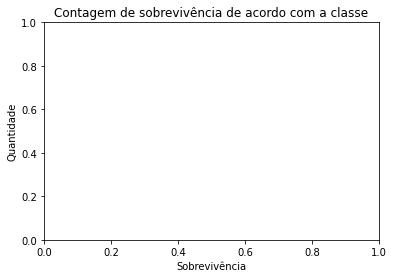

In [18]:
plt.title("Contagem de sobrevivência de acordo com a classe")
plt.xlabel("Sobrevivência")
plt.ylabel("Quantidade")
plt.show()

In [19]:
# proporção de sobrevivência por classe
df[["Pclass", "Survived"]].groupby(['Pclass']).mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


## Sex (gênero do passageiro)


In [20]:
df.Sex.value_counts()


male      577
female    314
Name: Sex, dtype: int64

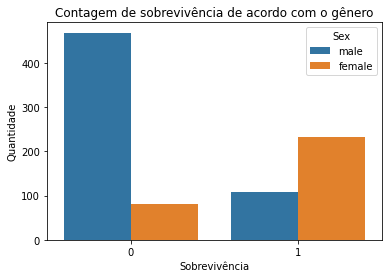

In [21]:
p = sns.countplot(data=df, x = 'Survived', hue = 'Sex')
plt.title("Contagem de sobrevivência de acordo com o gênero")
plt.xlabel("Sobrevivência")
plt.ylabel("Quantidade")
plt.show()

In [22]:
# proporção de sobrevivência por gênero
df[["Sex", "Survived"]].groupby(['Sex']).mean()*100

,Survived
Sex,
female,74.203822
male,18.890815


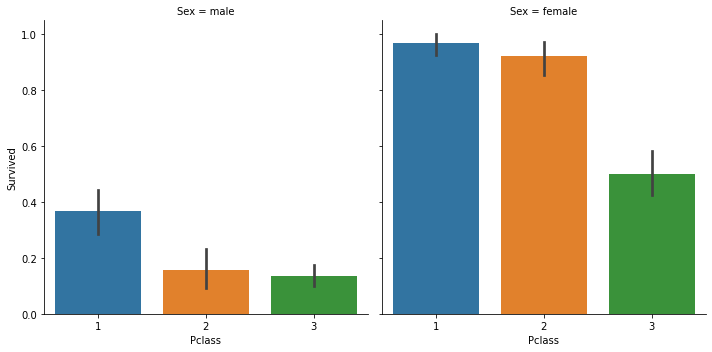

In [23]:
sns.catplot(x="Pclass", y="Survived", col="Sex", data=df,kind="bar");


## Age (idade do passageiro)


In [24]:
df['Age'].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


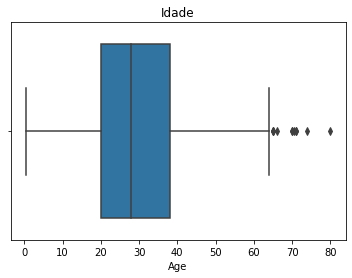

In [25]:
_ = sns.boxplot(df['Age']).set_title("Idade")


In [26]:
survived_age_not_null = df.loc[(df.Survived == 1) & (df.Age.isnull()==False), 'Age']
not_survived_age_not_null = df.loc[(df.Survived == 0) & (df.Age.isnull()==False), 'Age']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


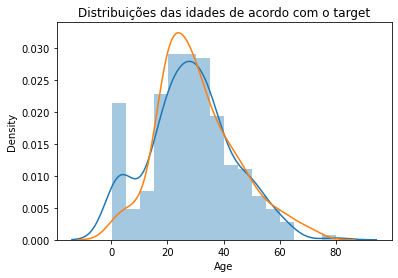

In [27]:
sns.distplot(survived_age_not_null, hist=True, label='Sobreviveu')
sns.distplot(not_survived_age_not_null, hist=False, label='Não sobreviveu')
_ = plt.title("Distribuições das idades de acordo com o target")


## Fare

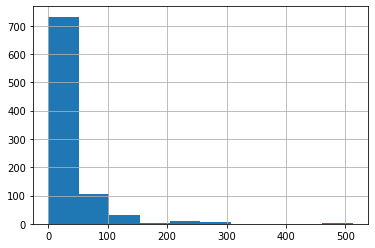

In [28]:
df["Fare"].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


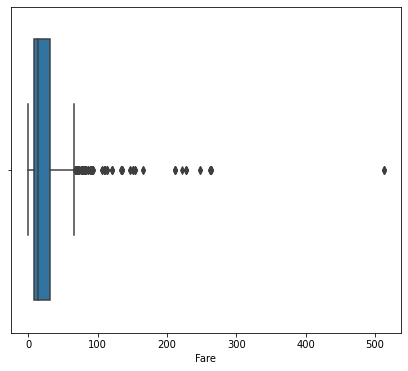

In [29]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(df['Fare'])
plt.show()


In [34]:
# Verificando a média do valor do ticket de acordo com a cabine do passageiro 
df2.groupby("Cabin")["Fare"].mean().reset_index(name="AVG Fare").sort_values("AVG Fare", ascending=False)

,Cabin,AVG Fare
15,B101,512.3292
63,C23 C25 C27,263.0000
35,B57 B59 B63 B66,262.3750
34,B51 B53 B55,258.6646
36,B58 B60,247.5208
...,...,...
139,F G63,7.6500
140,F G73,7.6500
11,A36,0.0000
46,B94,0.0000


In [53]:
# Verificando a média do valor do ticket de acordo com o local de embarque do passageiro 
df2.groupby("Embarked")["Fare"].mean().reset_index(name="AVG Fare").sort_values("AVG Fare", ascending=False)

,Embarked,AVG Fare
0,C,59.954144
2,S,27.079812
1,Q,13.276030


In [42]:
# Aparentemente existe uma relação entre o local de embarque e o valor pago na passagem 
df2["Embarked"].loc[df2["Fare"] > 100].value_counts()

C    29
S    24
Name: Embarked, dtype: int64

In [54]:
# Verificando a média do valor do ticket de acordo com o status de sobrevivência de cada passageiro
df2.groupby("Survived")["Fare"].mean().reset_index(name="AVG Fare").sort_values("AVG Fare", ascending=False)

,Survived,AVG Fare
1,1,48.395408
0,0,22.117887


In [52]:
# Verificando a média do valor do ticket de acordo com o local de embarque do passageiro e o status de sobrevivência de cada passageiro
df2.groupby(["Embarked", "Survived"])["Fare"].mean().reset_index(name="AVG Fare")

,Embarked,Survived,AVG Fare
0,C,0,35.443335
1,C,1,79.720926
2,Q,0,13.335904
3,Q,1,13.182227
4,S,0,20.743987
5,S,1,39.547081


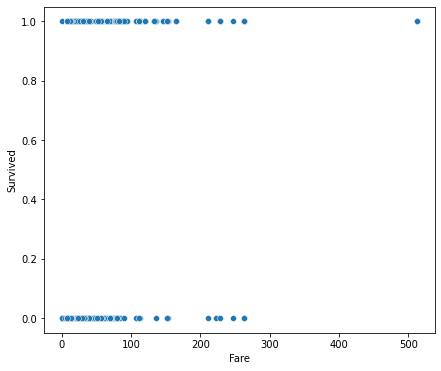

In [56]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.scatterplot(x = "Fare", y ="Survived", data = df2, ax=ax)
plt.show()


In [57]:
# Verificando a média do valor do ticket de acordo com a classe de cada passageiro
df2.groupby("Pclass")["Fare"].mean().reset_index(name="AVG Fare").sort_values("AVG Fare", ascending=False)

,Pclass,AVG Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [58]:
# Verificando a média do valor do ticket de acordo com o gênero de cada passageiro
df2.groupby("Sex")["Fare"].mean().reset_index(name="AVG Fare").sort_values("AVG Fare", ascending=False)

,Sex,AVG Fare
0,female,44.479818
1,male,25.523893


A média dos valores das passagens das mulheres é quase o dobro em comparação ao valos dos homens

In [59]:
# Verificando a média do valor do ticket de acordo com a classe de cada passageiro
df2.groupby("SibSp")["Fare"].mean().reset_index(name="AVG Fare").sort_values("AVG Fare", ascending=False)

,SibSp,AVG Fare
6,8,69.550000
3,3,68.908862
2,2,51.753718
5,5,46.900000
1,1,44.147370
4,4,31.855556
0,0,25.692028


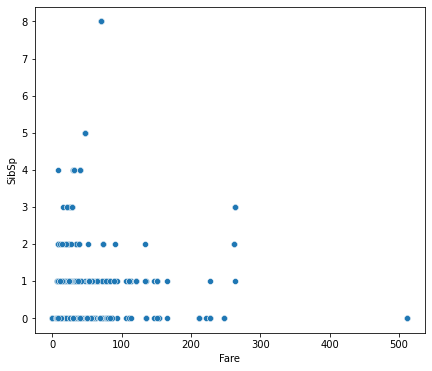

In [60]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.scatterplot(x = "Fare", y ="SibSp", data = df2, ax=ax)
plt.show()


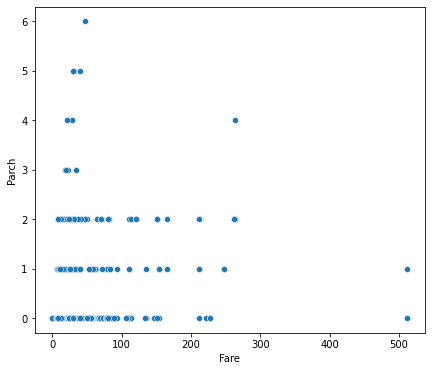

In [61]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.scatterplot(x = "Fare", y ="Parch", data = df2, ax=ax)
plt.show()


In [62]:
# Criando uma variável para o total da família 
df2["total_family"] = df["SibSp"] + df["Parch"]

In [65]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,total_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


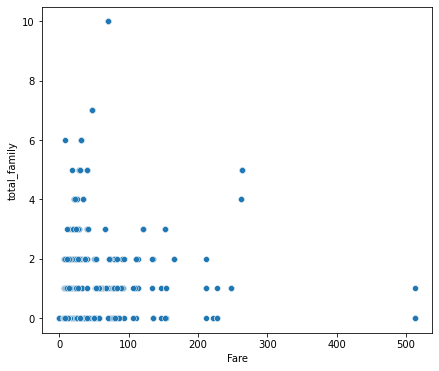

In [72]:
# Checando se tem alguma relação entre a quantidade de pessoas da família que embarcaram e o valor pago por elas
fig, ax = plt.subplots(figsize=(7, 6))
sns.scatterplot(x = "Fare", y ="total_family", data = df2, ax=ax)
plt.show()


## Embarked

In [67]:
# Verificando a quantidade de passageiros de cada classe de acordo com o local de embarque
df2.groupby("Embarked")["Pclass"].value_counts() 

Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         127
Name: Pclass, dtype: int64

## SibSp e Parch

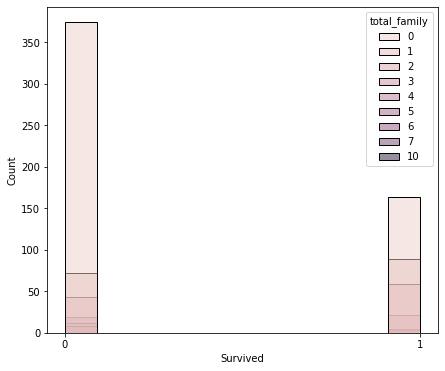

In [77]:
# Checando se tem alguma relação entre a quantidade de pessoas da família que embarcaram e se elas sobreviveram ou não
fig, ax = plt.subplots(figsize=(7, 6))
sns.histplot(df2, x ="Survived", hue = "total_family", ax=ax)
ax.set_xticks([0,1])
plt.show()


# Feature Engineering

## Tratamento de valores faltantes (missing values)


In [ ]:
median_age = df['Age'].median() 


In [ ]:
df.loc[df['Age'].isnull(), 'Age'] = median_age


## Conversão de features categóricas


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

# ao invés do LabelEncoder, também poderíamos ter feito só um map e passar as transformações que queríamos:
# df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1})

In [ ]:
df['Sex'].value_counts()


# Treinamento

In [ ]:
# nossas features
x = df[['Age', 'Sex', 'Pclass']]

# nosso target
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
# Separando os dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [ ]:
x_train.shape


In [ ]:
x_test.shape


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instanciando o classificador
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Treinamento do modelo
model.fit(x_train, y_train)

In [ ]:
# arquivo de texto que armazena a estrutura da nossa árvore de decisão
from sklearn.tree import export_graphviz
export_graphviz(model,out_file='titanic_tree.dot',feature_names=['Age', 'Sex', 'Pclass'],rounded=True,filled=True,class_names=['Não sobreviveu','Sobreviveu'])


In [ ]:
!dot -Tpng titanic_tree.dot -o titanic_tree.png


In [ ]:
from IPython.core.display import Image, display
display(Image('titanic_tree.png', width=1900, unconfined=True))

# Avaliando o modelo 

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
y_pred

In [ ]:
y_probs = model.predict_proba(x_test)


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(y_test, y_pred)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import itertools

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cnf_matrix, display_labels=[ 'não sobreviveu', 'sobreviveu'])
disp.plot(cmap='Blues')

In [ ]:
print(classification_report(y_test, y_pred, target_names=['não sobreviveu', 'sobreviveu']))


In [ ]:
from sklearn.metrics import roc_curve, auc

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc(fpr, tpr)

In [ ]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Interpretailidade

In [ ]:
!pip install git+https://github.com/slundberg/shap -q


In [ ]:
import shap


In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values[1], x_train, plot_type='bar')

# Predição 

In [ ]:
# substituímos os valores faltantes pela mediana da idade do conjunto de treinamento
submission.loc[submission['Age'].isnull(), 'Age'] = median_age

In [ ]:
# utilizamos o encoder que foi criado com base no conjunto de treinamento
# como o LabelEncoder já "aprendeu" com o conjunto de treinamento como substituir esses valores,
# a gente usa só o transform e não fit_transform como fizemos na feature engineering 
submission['Sex'] = encoder.transform(submission['Sex'])

In [ ]:
# realiza a predição para o conjunto de submissão do Kaggle
result = model.predict(submission[['Age', 'Sex', 'Pclass']])

In [ ]:
result

In [ ]:
# transformar o array em um DataFrame para concatenarmos como ID
results = pd.DataFrame(list(result), columns=['Survived'])

In [ ]:
submission = pd.concat([submission['PassengerId'], results],axis=1)
submission.head()